<a href="https://colab.research.google.com/github/rahmahkn/CNS_Lab/blob/main/CNS_Lab0_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 0: Differential Equations and Dynamical Systems

**Course:** Computational Neuroscience  
**Duration:** 2 hours  
**Prerequisites:** Calculus, Linear Algebra, Basic Python

---

## Learning Objectives

By the completion of this laboratory, you will be able to:

1. Understand the concept of a **differential equation/dynamical system**
2. Learn how to **analytically solve** a simple class of differential equations
3. Learn how to **numerically approximate** the solution to differential equations, and compare and contrast the advantages and disadvantages of different numerical methods
4. Learn how to **plot, visualise, and interpret** the solutions to simple differential equations
5. **Visualize and interpret** solutions to differential equations in phase space

---

## Introduction

Differential equations provide the mathematical foundation for modeling neural dynamics across all scales of brain organization. From the voltage dynamics of individual neurons to the collective behavior of neural populations, the models you will encounter throughout this course are formulated as systems of differential equations (or dynamical systems).

This laboratory serves as both a mathematical primer and a practical introduction to computational methods essential for neuroscience research. While future laboratories will focus specifically on neural phenomena, this foundational lab ensures you possess the analytical and numerical tools necessary for sophisticated modeling work.

---
## Where will I use this?
In this course, we will use differential equations to model neural dynamics at multiple levels. We begin with single neurons, analyzing how membrane voltage evolves in response to inputs. We then extend to networks of interconnected neurons, treating their collective activity as coupled differential equations—linking network dynamics to higher-level functions such as perception, cognition, and behaviour. Next, we study slower processes like learning and memory, which emerge from long-term synaptic changes. Finally, motivated by large-scale recordings from thousands of neurons, we introduce modern data analysis methods that combine dynamical systems theory with machine learning.
</br>

![image.png](attachment:image.png)

*Figure 2: We will use differential equations to model both single neurons and networks of neurons.* *Left:* *The change in the voltage across a neuron's cell membrane in response to an external current can be modelled as an electrical circuit described by a simple differential equation (see equation) [3]. You will explore that in Labs 1 and 2.* *Right:* *Neurons in certain brain regions become active when an animal faces a particular direction in its environment. The neural computations underlying this property can be modelled using a so-called ring network described as a system of coupled differential equations (see equation) [4,5]. You will build such network in Lab 3.*

---
## Note to Students
Please bear in mind that this is "*lab 0*", and it is therefore different in nature from other labs in the course. Whereas this lab exclusively covers mathematics and coding, future labs will be more closely focused on the implementation and investigation of models of the brain functions that we cover in lectures. This lab is designed to ensure that you have the necessary tools and knowledge for the later labs, and for the assessed coursework.

Lets get started!

## Section 1: Analytical Solutions to Ordinary Differential Equations

### 1.1 The Simplest Case: Exponential Dynamics

Consider the first-order linear ODE:

$$\frac{dx}{dt} = ax$$

where $a$ is a constant parameter. This equation appears frequently in neuroscience, modeling processes such as membrane potential decay or population growth dynamics.

An intuitive interpretation of this equation is that the rate of change of $x$ at any time $t$ is simply proportional to its current value. If $a > 0$, $x$ grows; if $a < 0$, it decays.

**Analytical Solution via Separation of Variables:**

We can solve this equation analytically using a method called [method of separation of variables](https://en.wikipedia.org/wiki/Separation_of_variables):

Rearranging terms:
$$\frac{1}{x}dx = a\,dt$$

Integrating both sides:
$$\int \frac{1}{x}dx = \int a\,dt$$

$$\ln|x| = at + C$$

Note that the solution obtained above involves a free parameter $C$, and so defines a whole family of solutions to the ODE. If we are additionally provided an initial condition, $x(0)=x_0$, we can find a particular solution to the ODE:
$$x(t) = x_0 e^{at}$$

where $x_0 = x(0)$ is the initial condition.

### 1.2 Visualization of Solution Behavior

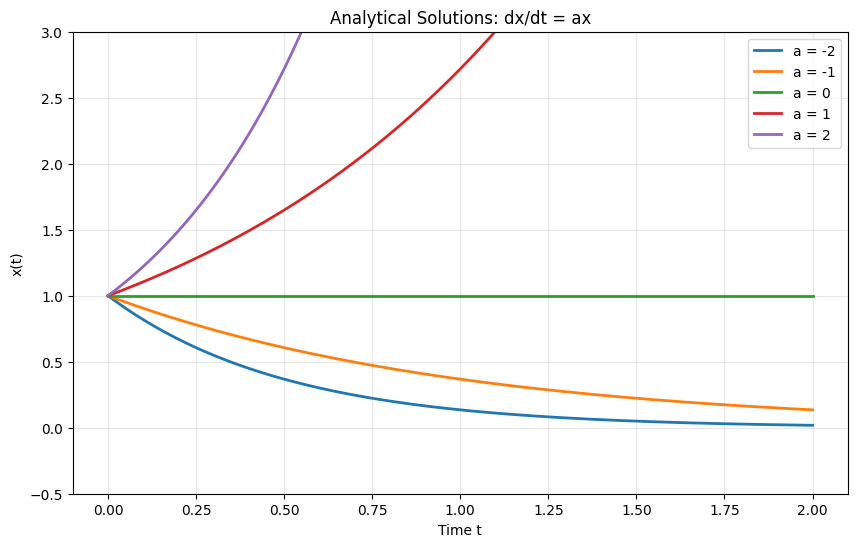

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Set up time domain
t = np.linspace(0, 2, 200)
x0 = 1.0

# Parameter values
a_values = [-2, -1, 0, 1, 2]

plt.figure(figsize=(10, 6))

for a in a_values:
    x_analytical = x0 * np.exp(a * t)
    plt.plot(t, x_analytical, linewidth=2, label=f"a = {a}")

plt.xlabel("Time t")
plt.ylabel("x(t)")
plt.title("Analytical Solutions: dx/dt = ax")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 3)
plt.show()

---

## Section 2: Numerical Methods for Differential Equations

### The Euler Method

For the general first-order ODE $\frac{dx}{dt} = f(t,x)$, analytical solutions are often intractable. Numerical methods provide approximate solutions by discretizing the continuous time domain. Intuitively, the idea behind this method is to write $dx = f(x) dt$, and iteratively update the equation via $x(t+dt) = x(t) + f(x) dt$, where $dx$ and $dt$ are very small. We make this idea more formal below.  

**Derivation of Euler's Method:**

Consider the [Taylor expansion](https://en.wikipedia.org/wiki/Taylor_series#Definition) of $x(t)$ around a point $t_n$:
$$x(t_n + dt) = x(t_n) + \frac{dx}{dt}\bigg|_{t_n} dt + O(dt^2)$$

Substituting the differential equation and neglecting higher-order terms:
$$x(t_{n+1}) \approx x(t_n) + f(t_n, x(t_n)) \cdot dt $$

where $dt$ is the time step.

### Exercise 2.1: Implementation of Euler's Method
**Objective:** Implement a general Euler solver for systems of ODEs.

**Task:** Define a Python function `euler_solver(f, x0, t_span, dt)` that takes as input:
- `f`: a function representing the ODE (i.e., $\frac{dx}{dt} = f(t, x)$). Note that `f` should accept two arguments: time `t` and state `x`, and return the derivative.
- `x0`: the initial condition (as a NumPy array). Note that `x0` must be an array, even for scalar ODEs.
- `t_span`: a tuple specifying the start and end times (e.g., `(0, 10)`)
- `step_size`: the time step for the simulation

In [ ]:
def euler_method(f, x0, t_span, step_size):
    """
    Solve ODE using Euler's method: dx/dt = f(t, x)

    Parameters:
    f: derivative function f(t, x)
    x0: ndarray, initial condition
    t_span: tuple (t_start, t_end) defining time interval for evaluation
    step_size: step size

    Returns:
    t: array of time points
    x: array of solution values
    """
    t_start, t_end = t_span
    t = np.arange(t_start, t_end + step_size, step_size)
    x = np.zeros((len(t), len(x0)))

    # TODO: Implement Euler's method
    pass

---

### Exercise 2.2: Simulating a Simple ODE
**Objective:** Simulate a simple ODE using your Euler solver.

**Task:** Test your implementation with the simple ODE $\frac{dx}{dt} = ax$ using $a = 1$, initial condition $x(0) = 1$, and simulate over $t \in [0, 5]$ with various step sizes.

In [ ]:
# TODO: Set parameters for testing
a = 1
x0 = np.array([1.0])
T_SPAN = (0, 5)
STEP_SIZE = 0.25

In [ ]:
def analytical_solution(t, x0=1.0):
    return x0 * np.exp(a * t)


# TODO: Define the ODE function, which must have parameters (t, x) for compatibility with your Euler solver


# TODO: Compute the numerical and analytical solutions using Euler's method


# TODO: Plot and compare the results

hmmm... something seems off here...

Lets fix it.

---

### Exercise 2.3: Convergence Analysis

**Objective:** Investigate how varying step sizes affects accuracy in comparison to the analytical solution.

**Task:** Using your ODE and Euler solver from Exercise 2.1 and 2.2, in a single plot show:
1. the analytic solution
2. the numeric solutions for $dt \in [1.0, 0.5, 0.25, 0.125]$
3. a different colour for each curve to visualise the results.


In [ ]:
# TODO: Experiment with different step sizes and observe the effect on accuracy

---

### Exercise 2.4: Advanced Numerical Methods
While Euler's method provides intuitive understanding, higher-order methods offer superior accuracy and stability. The `scipy.integrate.solve_ivp` function implements advanced algorithms including Runge-Kutta methods with adaptive step size control.

**Objective:** Compare your Euler solver with SciPy's `solve_ivp` function.

**Task:**
1. Use `solve_ivp` to solve the same ODE from Exercise 2.2 over the same interval and initial conditions.
2. Plot both solutions on the same graph to compare accuracy and computational efficiency.

In [ ]:
# TODO: Use the SciPy solution (default RK45 with adaptive stepping)


As you can see, the predictions on the relevant timepoints are almost identical. This is because the `RK45` method used by `solve_ivp` is a 4th/5th order Runge-Kutta method, which is significantly more accurate than the first-order Euler method for the same step size.

**Now, vary the `max_step` parameter in `solve_ivp` to see how it affects the solution.**

---

## Section 3: ODEs with Inputs

### Linear ODE with Time-Dependent Input

Consider the more general form:
$$\frac{dx}{dt} = ax + b(t)$$

This equation models systems subject to external driving forces, such as neurons receiving synaptic input.

**Analytical Solution via Integrating Factor Method:**

The general solution is:
$$x(t) = e^{at}x_0 + \int_0^t e^{a(t-\tau)} b(\tau) d\tau$$

In this case, we have an analytical solution involving an integral, and this integral cannot always be solved analytically. In such cases, rather than solving the integral numerically, we typically solve the ODE directly using the Euler method as above.

The derivation is provided below (read it after you finish the exercise).

### Exercise 3.1: Sinusoidal Forcing

**Task:** Analyze the response to sinusoidal input $b(t) = b_0 \sin(\omega t)$.

In [ ]:
# TODO: Define the system parameters, ODE function, and input function

---

### 3.2 Analytical Solution derivation via Integrating Factor Method

This ODE will crop up constantly throughout this course. It turns out that separation of variables doesn't work in this case (try it out and see!) However, another technique can be used called the [method of integrating factors](https://en.wikipedia.org/wiki/Integrating_factor). With this method, we multiply both sides of the ODE with some cleverly chosen function which allows a solution to be found. For the ODE above, we can write:

\begin{aligned}
&&\frac{dx}{dt} &= a x + b(t) \\
\implies&&e^{-at}\frac{dx}{dt} &= e^{-at} (a x + b(t)) \quad &&&\text{(multiply both sides by $e^{-at}$)}
\\ \implies&& \frac{d}{dt}\left( e^{-at} x\right) &= e^{-at} b(t) \hspace{1cm} &&&\left(\mathrm{since} \hspace{0.5cm} \frac{d}{dt}\left( e^{-at} x\right) = -ae^{-at}x + e^{-at} \frac{dx}{dt}  \right)
\\ \implies&& \int_0^t \frac{d}{d\tau}\left( e^{-a\tau} x(\tau)\right) d\tau &= \int_0^t e^{-a\tau} b(\tau) d\tau \quad &&&\text{(integrate both sides from $0$ to $t$)}
\\ \implies&& e^{-at} x(t) - e^{-a \cdot 0} x(0) &= \int_0^t e^{-a\tau} b(\tau) d\tau  \hspace{1cm} &&&\left(\mathrm{since} \hspace{0.5cm} \int_a^b f'(x)dx = f(b) - f(a)  \right)
\\ \implies&& x(t) &= e^{at} x_0 + \int_0^t e^{a(t-\tau)} b(\tau) d\tau
\end{aligned}

---

## Section 4: Linear Dynamical Systems

A very important class of dynamical systems in neuroscience is that of [linear dynamical systems](https://en.wikipedia.org/wiki/Linear_dynamical_system):

\begin{aligned}
\dot {\bf x} = W{\bf x} +  \mathbf{u}(t)
\end{aligned}

with ${\bf u}\in \mathbb{R}^n$, with $W\in \mathbb{R}^{n \times n}$.
This is the vector/matrix version of the ODE with input considered above, and the solution to this sytem can be derived in much the same way:
\begin{aligned}
\\{\bf x}(t) &= e^{Wt}{\bf x}_0 + \int_{0}^t e^{W(t-\tau)}{\bf u}(\tau)d\tau
\end{aligned}
where the *matrix exponential* is defined as $e^{Wt}=\sum_{i=0}^\infty \frac{W^it^i}{i!}$ (in analogy to the usual exponential function for scalars $e^{at} = \sum_{i=0}^{\infty} \frac{a^it^i}{i!}$).

The dynamics of ${\bf x}$ depends on the properties of the matrix $W$, such as its eigenvalues and eigenvectors, symmetry vs asymmetry/antisymmetry, etc. There is a vibrant literature relating these different kinds of dynamics to the behaviour of neural networks, and one could devote a whole course to this topic.

### Exercise 4.1: Three-Dimensional Linear System
Here we explore how antisymmetric $W$ (i.e. $W^T = -W$) leads to oscillations in the dynamics while symmetric $W$ (i.e. $W^T = W$) leads to so-called attractor dynamics in which activity quickly decays towards a fixed value.

**Objective:** Implement and simulate the following 3D linear dynamical system:
\begin{gather*}
\dot {\bf x} = W{\bf x} \\
W = \alpha_{symm}(B + B^T) + (1-\alpha_{symm})(B - B^T) - \alpha_{stable} I
\end{gather*}

where, ${\bf x}(t)\in \mathbb{R}^3$, ${\bf x}(0)=\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} $, $I$ is the identity matrix, and $B_{ij} \sim \mathcal{N}(0,1)$ is a random set of weights.

$\alpha_{symm} \in [0,1]$ interpolates between a symmetric matrix ($B + B^T$) and an antisymmetric one ($B - B^T$).

$\alpha_{stable} \in [0, \infty ]$ controls the strength of the decay term $-I$ to make the system more stable (i.e., so that $\mathbf{x}$ does not grow to very large values over time).

**Task:**
1. Implement the correct `f` for this system.
2. Numerically evaluate the system with scipy's `solve IVP` function on $t\in [0,10]$.
3. Plot the resulting dynamics in a 3D space using matplotlib.
4. Try varying each $\alpha$ and see how it influences the solution.
5. Comment on what you observe - how do the two parameters influence the dynamics?

Note: Since we are now dealing with random variables, it is important to set the random *seed*. You can do this by including the code `np.random.seed(1)`. You can also test the effect of varying the random seed on the solution.

In [ ]:
# TODO : Compute and plot the 3D trajectory


### 4.2 Further Exploration (Optional)

In [ ]:
# Let's analyze what just happened!

# Print the matrix W and its eigenvalues
print("Matrix W:")
print(W)
print(f"\nEigenvalues: {np.linalg.eigvals(W)}")

# Analyze stability
eigenvals = np.linalg.eigvals(W)
max_real_part = np.max(np.real(eigenvals))
print(f"Maximum real part: {max_real_part:.3f}")
print(f"System is: {'Stable' if max_real_part < 0 else 'Unstable'}")

# Time evolution
plt.plot(solution.t, solution.y[0], "r-", linewidth=2, label="x₁(t)")
plt.plot(solution.t, solution.y[1], "g-", linewidth=2, label="x₂(t)")
plt.plot(solution.t, solution.y[2], "b-", linewidth=2, label="x₃(t)")
plt.xlabel("Time")
plt.ylabel("State Variables")
plt.title("Time Evolution")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()